<a href="https://colab.research.google.com/github/ashish311002/SoC-Personality-Detection-using-data-from-Social-Media/blob/main/SoC_FinalImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.subplots as subplots
import cufflinks as cf
%matplotlib inline
from plotly.offline import iplot
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler

from sklearn.preprocessing import MinMaxScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [4]:
df=pd.read_csv('/content/gdrive/MyDrive/datasets_for_SoC/Big Five Personality Test/data-final.csv',delimiter='\t')


In [5]:
df

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,dateload,screenw,screenh,introelapse,testelapse,endelapse,IPC,country,lat_appx_lots_of_err,long_appx_lots_of_err
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,2016-03-03 02:01:01,768.0,1024.0,9.0,234.0,6,1,GB,51.5448,0.1991
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2016-03-03 02:01:20,1360.0,768.0,12.0,179.0,11,1,MY,3.1698,101.706
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,2016-03-03 02:01:56,1366.0,768.0,3.0,186.0,7,1,GB,54.9119,-1.3833
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2016-03-03 02:02:02,1920.0,1200.0,186.0,219.0,7,1,GB,51.75,-1.25
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,2016-03-03 02:02:57,1366.0,768.0,8.0,315.0,17,2,KE,1.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2018-11-08 12:04:58,1920.0,1080.0,3.0,160.0,10,2,US,39.9883,-75.2208
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,2018-11-08 12:07:18,1920.0,1080.0,3.0,122.0,7,1,US,38.0,-97.0
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,2018-11-08 12:07:49,1920.0,1080.0,2.0,135.0,12,6,US,36.1473,-86.777
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2018-11-08 12:08:34,1920.0,1080.0,6.0,212.0,8,1,US,34.1067,-117.8067


#EDA


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1015341 entries, 0 to 1015340
Data columns (total 110 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    EXT1                   float64
 1    EXT2                   float64
 2    EXT3                   float64
 3    EXT4                   float64
 4    EXT5                   float64
 5    EXT6                   float64
 6    EXT7                   float64
 7    EXT8                   float64
 8    EXT9                   float64
 9    EXT10                  float64
 10   EST1                   float64
 11   EST2                   float64
 12   EST3                   float64
 13   EST4                   float64
 14   EST5                   float64
 15   EST6                   float64
 16   EST7                   float64
 17   EST8                   float64
 18   EST9                   float64
 19   EST10                  float64
 20   AGR1                   float64
 21   AGR2                   float6

In [7]:
data=df.copy()

In [8]:
#To drop all columns except the ones which are necessary(Country column as well as the questions columns)
data.drop(data.columns[50:107],axis=1,inplace=True)
data.drop(data.columns[51:],axis=1,inplace=True)

In [9]:
data.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [10]:
data.shape

(1015341, 51)

In [11]:
print(data.isnull().values.sum())

89227


In [12]:
data.dropna(inplace=True)

In [13]:
data.shape

(1013481, 51)

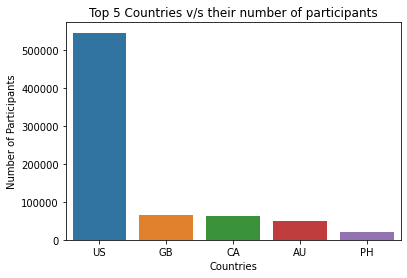

In [14]:
countries=pd.DataFrame(data['country'].value_counts())
top5countries=countries[0:5]

sns.barplot(data=top5countries, x=top5countries.index, y='country')
plt.title('Top 5 Countries v/s their number of participants')
plt.ylabel('Number of Participants')
plt.xlabel('Countries')
plt.show()

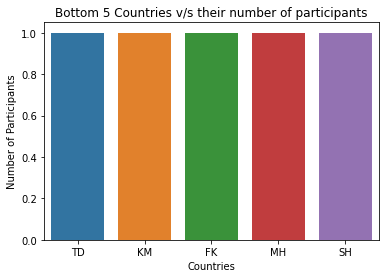

In [15]:
#5 Countries with Least Amount of participants
bottom5countries=countries[-5:]

sns.barplot(data=bottom5countries, x=bottom5countries.index, y='country')
plt.title('Bottom 5 Countries v/s their number of participants')
plt.ylabel('Number of Participants')
plt.xlabel('Countries')
plt.show()

In [16]:
#These questions come from the txt file of this dataset
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}

# Extracting columns for a particular trait from the complete dataset.
EXT = data.loc[:, data.columns.str.startswith('EXT')]
EST = data.loc[:, data.columns.str.startswith('EST')]
AGR = data.loc[:, data.columns.str.startswith('AGR')]
CSN = data.loc[:, data.columns.str.startswith('CSN')]
OPN = data.loc[:, data.columns.str.startswith('OPN')]


In [17]:
temp=pd.DataFrame(EXT['EXT1'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT1',title=ext_questions['EXT1'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [18]:
temp=pd.DataFrame(EXT['EXT2'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT2',title=ext_questions['EXT2'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()
        

In [19]:
temp=pd.DataFrame(EXT['EXT3'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT3',title=ext_questions['EXT3'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [20]:
temp=pd.DataFrame(EXT['EXT4'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT4',title=ext_questions['EXT4'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [21]:
temp=pd.DataFrame(EXT['EXT5'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT5',title=ext_questions['EXT5'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [22]:
temp=pd.DataFrame(EXT['EXT6'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT6',title=ext_questions['EXT6'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [23]:
temp=pd.DataFrame(EXT['EXT7'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT7',title=ext_questions['EXT7'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [24]:
temp=pd.DataFrame(EXT['EXT8'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT8',title=ext_questions['EXT8'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [25]:
temp=pd.DataFrame(EXT['EXT9'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT9',title=ext_questions['EXT9'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [26]:
temp=pd.DataFrame(EXT['EXT10'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EXT10',title=ext_questions['EXT10'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [27]:
temp=pd.DataFrame(EST['EST1'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST1',title=est_questions['EST1'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [28]:
temp=pd.DataFrame(EST['EST2'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST2',title=est_questions['EST2'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [29]:
temp=pd.DataFrame(EST['EST3'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST3',title=est_questions['EST3'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [30]:
temp=pd.DataFrame(EST['EST4'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST4',title=est_questions['EST4'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [31]:
temp=pd.DataFrame(EST['EST5'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST5',title=est_questions['EST5'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [32]:
temp=pd.DataFrame(EST['EST6'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST6',title=est_questions['EST6'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [33]:
temp=pd.DataFrame(EST['EST7'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST7',title=est_questions['EST7'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [34]:
temp=pd.DataFrame(EST['EST8'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST8',title=est_questions['EST8'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [35]:
temp=pd.DataFrame(EST['EST9'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST9',title=est_questions['EST9'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [36]:
temp=pd.DataFrame(EST['EST10'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='EST10',title=est_questions['EST10'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [37]:
temp=pd.DataFrame(AGR['AGR1'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR1',title=agr_questions['AGR1'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [38]:
temp=pd.DataFrame(AGR['AGR2'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR2',title=agr_questions['AGR2'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [39]:
temp=pd.DataFrame(AGR['AGR3'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR3',title=agr_questions['AGR3'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [40]:
temp=pd.DataFrame(AGR['AGR4'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR4',title=agr_questions['AGR4'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [41]:
temp=pd.DataFrame(AGR['AGR5'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR5',title=agr_questions['AGR5'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [42]:
temp=pd.DataFrame(AGR['AGR6'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR6',title=agr_questions['AGR6'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [43]:
temp=pd.DataFrame(AGR['AGR7'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR7',title=agr_questions['AGR7'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [44]:
temp=pd.DataFrame(AGR['AGR8'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR8',title=agr_questions['AGR8'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [45]:
temp=pd.DataFrame(AGR['AGR9'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR9',title=agr_questions['AGR9'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [46]:
temp=pd.DataFrame(AGR['AGR10'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='AGR10',title=agr_questions['AGR10'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [47]:
temp=pd.DataFrame(CSN['CSN1'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN1',title=csn_questions['CSN1'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [48]:
temp=pd.DataFrame(CSN['CSN2'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN2',title=csn_questions['CSN2'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [49]:
temp=pd.DataFrame(CSN['CSN3'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN3',title=csn_questions['CSN3'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [50]:
temp=pd.DataFrame(CSN['CSN4'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN4',title=csn_questions['CSN4'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [51]:
temp=pd.DataFrame(CSN['CSN5'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN5',title=csn_questions['CSN5'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [52]:
temp=pd.DataFrame(CSN['CSN6'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN6',title=csn_questions['CSN6'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [53]:
temp=pd.DataFrame(CSN['CSN7'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN7',title=csn_questions['CSN7'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [54]:
temp=pd.DataFrame(CSN['CSN8'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN8',title=csn_questions['CSN8'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [55]:
temp=pd.DataFrame(CSN['CSN9'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN9',title=csn_questions['CSN9'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [56]:
temp=pd.DataFrame(CSN['CSN10'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='CSN10',title=csn_questions['CSN10'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [57]:
temp=pd.DataFrame(OPN['OPN1'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN1',title=opn_questions['OPN1'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [58]:
temp=pd.DataFrame(OPN['OPN2'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN2',title=opn_questions['OPN2'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [59]:
temp=pd.DataFrame(OPN['OPN3'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN3',title=opn_questions['OPN3'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [60]:
temp=pd.DataFrame(OPN['OPN4'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN4',title=opn_questions['OPN4'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [61]:
temp=pd.DataFrame(OPN['OPN5'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN5',title=opn_questions['OPN5'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [62]:
temp=pd.DataFrame(OPN['OPN6'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN6',title=opn_questions['OPN6'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [63]:
temp=pd.DataFrame(OPN['OPN7'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN7',title=opn_questions['OPN7'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [64]:
temp=pd.DataFrame(OPN['OPN8'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN8',title=opn_questions['OPN8'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [65]:
temp=pd.DataFrame(OPN['OPN9'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN9',title=opn_questions['OPN9'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()

In [66]:
temp=pd.DataFrame(OPN['OPN10'].value_counts())

temp=temp.reset_index()
#temp
fig = px.bar(temp, x='index', y='OPN10',title=opn_questions['OPN10'])
fig.update_layout(xaxis_title='Rating',yaxis_title='Number of Participants')
fig.show()


#CLUSTERING(k-Means)

In [67]:
#k-Means clustering
from sklearn.cluster import KMeans

new_data = data.drop('country', axis=1)

kmeans = KMeans(n_clusters=5,random_state=0)
new_data.dropna(inplace=True)
k_fit = kmeans.fit(new_data)

In [68]:
pd.options.display.max_columns = 50;
predictions = k_fit.labels_
new_data['Clusters'] = predictions;
nn_data=new_data
new_data['extraversion']=0
new_data['neuroticism']=0
new_data['agreeableness']=0
new_data['conscientiousness']=0
new_data['extraversion']=0
new_data["extraversion"]= (new_data.EXT1 + new_data.EXT2 + new_data.EXT3 + new_data.EXT4 + new_data.EXT5 + new_data.EXT6 + new_data.EXT7 + new_data.EXT8 + new_data.EXT9 + new_data.EXT10)/10
new_data["neuroticism"] = (new_data.EST1 + new_data.EST2 + new_data.EST3 + new_data.EST4 + new_data.EST5 + new_data.EST6 + new_data.EST7 + new_data.EST8 + new_data.EST9 + new_data.EST10)/10
new_data["agreeableness"] = (new_data.AGR1 + new_data.AGR2 + new_data.AGR3 + new_data.AGR4 + new_data.AGR5 + new_data.AGR6 + new_data.AGR7 + new_data.AGR8 + new_data.AGR9 + new_data.AGR10)/10
new_data["conscientiousness"] = (new_data.CSN1 + new_data.CSN2 + new_data.CSN3 + new_data.CSN4 + new_data.CSN5 + new_data.CSN6 + new_data.CSN7 + new_data.CSN8 + new_data.CSN9 + new_data.CSN10)/10
new_data["openness"] = (new_data.OPN1 + new_data.OPN2 + new_data.OPN3 + new_data.OPN4 + new_data.OPN5 + new_data.OPN6 + new_data.OPN7 + new_data.OPN8 + new_data.OPN9 + new_data.OPN10)/10
new_data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,...,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,Clusters,extraversion,neuroticism,agreeableness,conscientiousness,openness
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,...,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,2,3.0,2.4,3.1,3.2,3.3
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,...,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,3,3.4,2.1,3.2,3.1,2.7
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,...,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,3,2.9,2.6,2.8,2.8,3.1
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,...,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,1,2.6,2.7,3.2,2.7,3.1
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,...,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,2,3.5,2.3,3.0,3.2,3.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015336,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,3.0,3.0,4.0,3.0,4.0,3.0,3.0,3.0,5.0,4.0,2.0,5.0,2.0,...,3.0,3.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,0,3.2,3.3,3.6,3.1,2.9
1015337,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,4.0,3.0,5.0,1.0,5.0,5.0,4.0,4.0,4.0,5.0,2.0,4.0,1.0,4.0,3.0,...,2.0,3.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,4.0,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,0,3.4,4.0,3.3,2.8,3.3
1015338,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,3.0,2.0,4.0,3.0,2.0,2.0,4.0,2.0,4.0,1.0,3.0,5.0,5.0,3.0,2.0,...,5.0,3.0,5.0,1.0,5.0,1.0,4.0,1.0,4.0,5.0,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,0,3.3,2.7,3.5,3.3,3.6
1015339,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,3.0,4.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,2.0,3.0,2.0,4.0,3.0,...,2.0,4.0,2.0,2.0,2.0,4.0,2.0,4.0,4.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,3,2.8,3.3,3.1,3.0,3.5


In [69]:
new_data[["extraversion", "neuroticism", "agreeableness", "conscientiousness", "openness"]].describe()

,extraversion,neuroticism,agreeableness,conscientiousness,openness
count,1.013481e+06,1.013481e+06,1.013481e+06,1.013481e+06,1.013481e+06
mean,3.023496e+00,3.024130e+00,3.155447e+00,3.123387e+00,3.265826e+00
std,3.860970e-01,6.733344e-01,4.022617e-01,4.284525e-01,4.296064e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+00,2.600000e+00,2.900000e+00,2.900000e+00,3.000000e+00
50%,3.000000e+00,3.000000e+00,3.200000e+00,3.100000e+00,3.300000e+00
75%,3.200000e+00,3.500000e+00,3.400000e+00,3.400000e+00,3.500000e+00
max,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00


          extraversion  neuroticism  agreeableness  conscientiousness  \
Clusters                                                                
0             3.072319     3.426905       3.300150           3.211572   
1             2.908876     2.527148       2.851101           2.914512   
2             3.085391     2.423243       3.208987           3.106765   
3             3.052292     2.980385       3.187251           3.158311   
4             2.966067     3.646294       3.149112           3.173517   

          openness  
Clusters            
0         3.352326  
1         3.120620  
2         3.327435  
3         3.242899  
4         3.245777  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



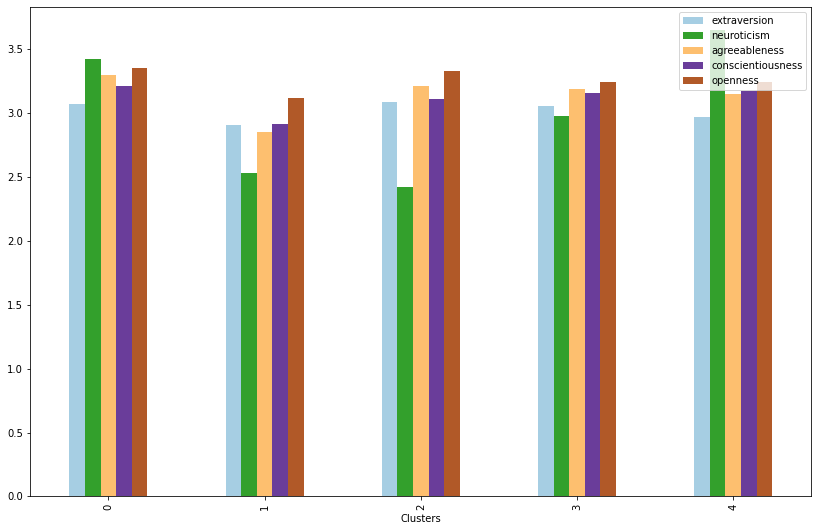

In [70]:
table = new_data.groupby('Clusters')["extraversion", "neuroticism", "agreeableness", "conscientiousness", "openness"].mean()
print(table)

table.plot(figsize=(14,9), kind="bar", colormap='Paired')

In [71]:
new_data['Clusters'].value_counts()

0    227170
3    212942
2    209731
4    200656
1    162982
Name: Clusters, dtype: int64

In [72]:
data1=pd.DataFrame()
for i in range(1,11):
  lst=list()
  temp=int(input(ext_questions[f'EXT{i}']))
  lst.append(temp)
  data1[f'EXT{i}']=lst

I am the life of the party4
I dont talk a lot4
I feel comfortable around people4
I keep in the background5
I start conversations5
I have little to say5
I talk to a lot of different people at parties5
I dont like to draw attention to myself5
I dont mind being the center of attention5
I am quiet around strangers4


In [73]:
for i in range(1,11):
  lst=list()
  temp=int(input(est_questions[f'EST{i}']))
  lst.append(temp)
  data1[f'EST{i}']=lst

I get stressed out easily5
I am relaxed most of the time5
I worry about things4
I seldom feel blue5
I am easily disturbed5
I get upset easily4
I change my mood a lot5
I have frequent mood swings5
I get irritated easily5
I often feel blue5


In [74]:
for i in range(1,11):
  lst=list()
  temp=int(input(agr_questions[f'AGR{i}']))
  lst.append(temp)
  data1[f'AGR{i}']=lst

I feel little concern for others4
I am interested in people5
I insult people5
I sympathize with others feelings5
I am not interested in other peoples problems5
I have a soft heart4
I am not really interested in others5
I take time out for others1
I feel others emotions1
I make people feel at ease1


In [75]:
for i in range(1,11):
  lst=list()
  temp=int(input(csn_questions[f'CSN{i}']))
  lst.append(temp)
  data1[f'CSN{i}']=lst

I am always prepared1
I leave my belongings around2
I pay attention to details1
I make a mess of things5
I get chores done right away5
I often forget to put things back in their proper place1
I like order5
I shirk my duties1
I follow a schedule1
I am exacting in my work5


In [76]:
for i in range(1,11):
  lst=list()
  temp=int(input(opn_questions[f'OPN{i}']))
  lst.append(temp)
  data1[f'OPN{i}']=lst

I have a rich vocabulary5
I have difficulty understanding abstract ideas5
I have a vivid imagination5
I am not interested in abstract ideas1
I have excellent ideas1
I do not have a good imagination1
I am quick to understand things1
I use difficult words5
I spend time reflecting on things5
I am full of ideas5


In [77]:
data1.shape
data1

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10
0,4,4,4,5,5,5,5,5,5,4,5,5,4,5,5,4,5,5,5,5,4,5,5,5,5,4,5,1,1,1,1,2,1,5,5,1,5,1,1,5,5,5,5,1,1,1,1,5,5,5


In [78]:
input_personality_cluster=k_fit.predict(data1)
print('Given Personality Cluster:',input_personality_cluster)
print(table[input_personality_cluster[0]:input_personality_cluster[0]+1])

Given Personality Cluster: [4]
          extraversion  neuroticism  agreeableness  conscientiousness  \
Clusters                                                                
4             2.966067     3.646294       3.149112           3.173517   

          openness  
Clusters            
4         3.245777  


#Neural Network Implementation


For Neural Networks Took inspiration from:https://towardsdatascience.com/pytorch-tabular-multiclass-classification-9f8211a123ab <br/>
(Neural Network Model using pytorch library)

In [79]:
data.shape

(1013481, 51)

In [80]:


X=data.drop(['country'],axis=1)
y=nn_data['Clusters']





In [81]:
# Split into train+val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=69)

# Split train into train-val
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1, stratify=y_trainval, random_state=21)

In [82]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
X_train, y_train = np.array(X_train), np.array(y_train)
X_val, y_val = np.array(X_val), np.array(y_val)
X_test, y_test = np.array(X_test), np.array(y_test)

In [83]:
def get_class_distribution(obj):
    count_dict = {
        "cluster_0": 0,
        "cluster_1": 0,
        "cluster_2": 0,
        "cluster_3": 0,
        "cluster_4": 0,
        
    }
    
    for i in obj:
        if i == 0: 
            count_dict['cluster_0'] += 1
        elif i == 1: 
            count_dict['cluster_1'] += 1
        elif i == 2: 
            count_dict['cluster_2'] += 1
        elif i == 3: 
            count_dict['cluster_3'] += 1
        elif i == 4: 
            count_dict['cluster_4'] += 1  
                    
      
            
    return count_dict

In [85]:
class ClassifierDataset(Dataset):
    
    def __init__(self, X_data, y_data):
        self.X_data = X_data
        self.y_data = y_data
        
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
        
    def __len__ (self):
        return len(self.X_data)


train_dataset = ClassifierDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).long())
val_dataset = ClassifierDataset(torch.from_numpy(X_val).float(), torch.from_numpy(y_val).long())
test_dataset = ClassifierDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).long())

In [86]:
target_list = []
for _, t in train_dataset:
    target_list.append(t)
    
target_list = torch.tensor(target_list)

In [87]:
class_count = [i for i in get_class_distribution(y_train).values()]
class_weights = 1./torch.tensor(class_count, dtype=torch.float) 
print(class_weights)

tensor([6.1139e-06, 8.5217e-06, 6.6223e-06, 6.5224e-06, 6.9218e-06])


In [88]:
class_weights_all = class_weights[target_list]

In [89]:
weighted_sampler = WeightedRandomSampler(
    weights=class_weights_all,
    num_samples=len(class_weights_all),
    replacement=True
)

In [103]:
EPOCHS = 20
BATCH_SIZE = 16
LEARNING_RATE = 0.0007
NUM_FEATURES = len(X.columns)
NUM_CLASSES = 5

In [104]:
train_loader = DataLoader(dataset=train_dataset,
                          batch_size=BATCH_SIZE,
                          sampler=weighted_sampler
)
val_loader = DataLoader(dataset=val_dataset, batch_size=1)
test_loader = DataLoader(dataset=test_dataset, batch_size=1)

In [105]:
class MulticlassClassification(nn.Module):
    def __init__(self, num_feature, num_class):
        super(MulticlassClassification, self).__init__()
        
        self.layer_1 = nn.Linear(num_feature, 512)
        self.layer_2 = nn.Linear(512, 128)
        self.layer_3 = nn.Linear(128, 64)
        self.layer_out = nn.Linear(64, num_class) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.2)
        self.batchnorm1 = nn.BatchNorm1d(512)
        self.batchnorm2 = nn.BatchNorm1d(128)
        self.batchnorm3 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        x = self.layer_1(x)
        x = self.batchnorm1(x)
        x = self.relu(x)
        
        x = self.layer_2(x)
        x = self.batchnorm2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_3(x)
        x = self.batchnorm3(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.layer_out(x)
        
        return x

In [107]:
model = MulticlassClassification(num_feature = NUM_FEATURES, num_class=NUM_CLASSES)
model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
print(model)

MulticlassClassification(
  (layer_1): Linear(in_features=50, out_features=512, bias=True)
  (layer_2): Linear(in_features=512, out_features=128, bias=True)
  (layer_3): Linear(in_features=128, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=5, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (batchnorm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm3): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [108]:
def multi_acc(y_pred, y_test):
    y_pred_softmax = torch.log_softmax(y_pred, dim = 1)
    _, y_pred_tags = torch.max(y_pred_softmax, dim = 1)    
    
    correct_pred = (y_pred_tags == y_test).float()
    acc = correct_pred.sum() / len(correct_pred)
    
    acc = torch.round(acc * 100)
    
    return acc

In [109]:
accuracy_stats = {
    'train': [],
    "val": []
}
loss_stats = {
    'train': [],
    "val": []
}

In [110]:
print("Begin training.")
for e in tqdm(range(1, EPOCHS+1)):
    
    # TRAINING
    train_epoch_loss = 0
    train_epoch_acc = 0
    model.train()
    for X_train_batch, y_train_batch in train_loader:
        X_train_batch, y_train_batch = X_train_batch.to(device), y_train_batch.to(device)
        optimizer.zero_grad()
        
        y_train_pred = model(X_train_batch)
        
        train_loss = criterion(y_train_pred, y_train_batch)
        train_acc = multi_acc(y_train_pred, y_train_batch)
        
        train_loss.backward()
        optimizer.step()
        
        train_epoch_loss += train_loss.item()
        train_epoch_acc += train_acc.item()
        
        
    # VALIDATION    
    with torch.no_grad():
        
        val_epoch_loss = 0
        val_epoch_acc = 0
        
        model.eval()
        for X_val_batch, y_val_batch in val_loader:
            X_val_batch, y_val_batch = X_val_batch.to(device), y_val_batch.to(device)
            
            y_val_pred = model(X_val_batch)
                        
            val_loss = criterion(y_val_pred, y_val_batch)
            val_acc = multi_acc(y_val_pred, y_val_batch)
            
            val_epoch_loss += val_loss.item()
            val_epoch_acc += val_acc.item()
    loss_stats['train'].append(train_epoch_loss/len(train_loader))
    loss_stats['val'].append(val_epoch_loss/len(val_loader))
    accuracy_stats['train'].append(train_epoch_acc/len(train_loader))
    accuracy_stats['val'].append(val_epoch_acc/len(val_loader))
                              
    
    print(f'Epoch {e+0:03}: | Train Loss: {train_epoch_loss/len(train_loader):.5f} | Val Loss: {val_epoch_loss/len(val_loader):.5f} | Train Acc: {train_epoch_acc/len(train_loader):.3f}| Val Acc: {val_epoch_acc/len(val_loader):.3f}')


Begin training.


  0%|          | 0/20 [00:00<?, ?it/s]

Epoch 001: | Train Loss: 0.41588 | Val Loss: 0.24220 | Train Acc: 83.226| Val Acc: 94.224
Epoch 002: | Train Loss: 0.38311 | Val Loss: 0.22599 | Train Acc: 84.462| Val Acc: 93.653
Epoch 003: | Train Loss: 0.34463 | Val Loss: 0.19659 | Train Acc: 86.138| Val Acc: 95.005
Epoch 004: | Train Loss: 0.32297 | Val Loss: 0.20302 | Train Acc: 87.069| Val Acc: 93.035
Epoch 005: | Train Loss: 0.30982 | Val Loss: 0.18581 | Train Acc: 87.574| Val Acc: 95.391
Epoch 006: | Train Loss: 0.29830 | Val Loss: 0.16467 | Train Acc: 88.065| Val Acc: 95.439
Epoch 007: | Train Loss: 0.29008 | Val Loss: 0.18344 | Train Acc: 88.390| Val Acc: 93.179
Epoch 008: | Train Loss: 0.28369 | Val Loss: 0.18255 | Train Acc: 88.665| Val Acc: 94.180
Epoch 009: | Train Loss: 0.27769 | Val Loss: 0.18691 | Train Acc: 88.888| Val Acc: 93.355
Epoch 010: | Train Loss: 0.27282 | Val Loss: 0.15769 | Train Acc: 89.101| Val Acc: 96.276
Epoch 011: | Train Loss: 0.26963 | Val Loss: 0.15695 | Train Acc: 89.232| Val Acc: 96.066
Epoch 012:

Text(0.5, 1.0, 'Train-Val Loss/Epoch')

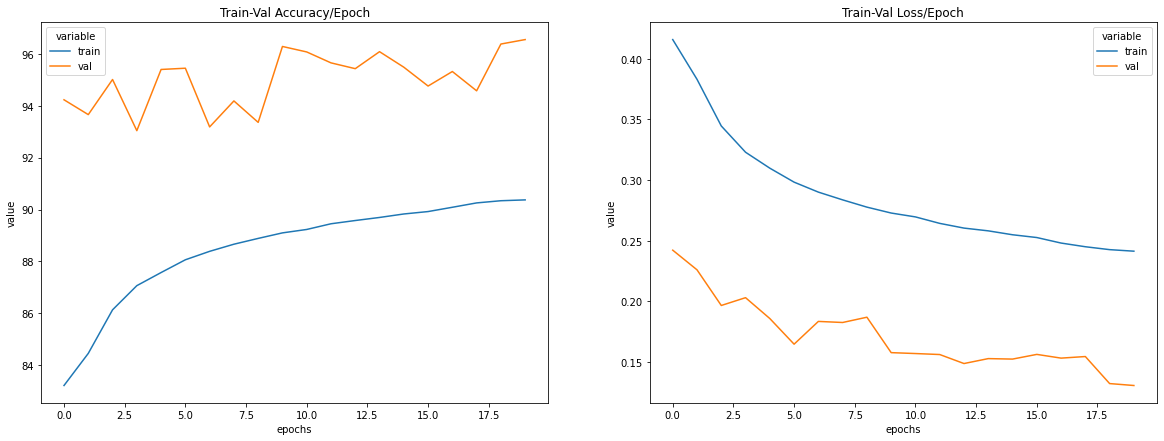

In [111]:
train_val_acc_df = pd.DataFrame.from_dict(accuracy_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
train_val_loss_df = pd.DataFrame.from_dict(loss_stats).reset_index().melt(id_vars=['index']).rename(columns={"index":"epochs"})
# Plot the dataframes
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7))
sns.lineplot(data=train_val_acc_df, x = "epochs", y="value", hue="variable",  ax=axes[0]).set_title('Train-Val Accuracy/Epoch')
sns.lineplot(data=train_val_loss_df, x = "epochs", y="value", hue="variable", ax=axes[1]).set_title('Train-Val Loss/Epoch')

In [112]:
y_pred_list = []
with torch.no_grad():
    model.eval()
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        y_test_pred = model(X_batch)
        _, y_pred_tags = torch.max(y_test_pred, dim = 1)
        y_pred_list.append(y_pred_tags.cpu().numpy())
y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

In [113]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     45434
           1       0.93      0.98      0.96     32597
           2       0.97      0.98      0.98     41946
           3       0.98      0.94      0.96     42589
           4       0.99      0.94      0.96     40131

    accuracy                           0.96    202697
   macro avg       0.96      0.97      0.96    202697
weighted avg       0.97      0.96      0.96    202697

